In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v4.5.3_x_factor_targeted_exposure/ciff_sam/2021_11_02_20_09_56/count_data/'

In [13]:
figname = 'model_4_calibration_test'

In [3]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [4]:
state_pt = pd.read_csv(output_dir +'wasting_transition_count.csv')
state_pt.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,x_factor,sq_lns,wasting_treatment,age
0,0,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,uncovered,early_neonatal
3,3,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,uncovered,early_neonatal
4,4,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,uncovered,covered,early_neonatal


In [5]:
state_pt.measure.unique()

array(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
       'mild_child_wasting_to_susceptible_to_child_wasting_event_count',
       'moderate_acute_malnutrition_to_mild_child_wasting_event_count',
       'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count',
       'severe_acute_malnutrition_to_mild_child_wasting_event_count',
       'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count',
       'susceptible_to_child_wasting_to_mild_child_wasting_event_count'],
      dtype=object)

In [6]:
def calculate_wasting_incidence_reduction(groupby_cols):
    data = pd.read_csv(output_dir + 'wasting_transition_count.csv')
    data = data.loc[data.measure.isin(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
                                      'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count'])]
    data = data.groupby(groupby_cols).sum()['value'].reset_index()
    baseline = data.loc[data.scenario=='baseline'].set_index([c for c in groupby_cols if c != 'scenario']).drop(columns='scenario')
    pct_reduction = (baseline - data.set_index(groupby_cols)) / baseline * 100
    pct_reduction = pct_reduction.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
    return pct_reduction

calculate_wasting_incidence_reduction(['input_draw','measure','scenario'])

value  \
                                                                     count   
measure                                            scenario                  
mild_child_wasting_to_moderate_acute_malnutriti... baseline           12.0   
                                                   sqlns              12.0   
                                                   wasting_treatment  12.0   
moderate_acute_malnutrition_to_severe_acute_mal... baseline           12.0   
                                                   sqlns              12.0   
                                                   wasting_treatment  12.0   

                                                                                 \
                                                                           mean   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns              10.279503   
                                                   wasting_treatment  -2.127689   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              22.583602   
                                                   wasting_treatment  14.230709   

                                                                                \
                                                                           std   
measure                                            scenario                      
mild_child_wasting_to_moderate_acute_malnutriti... baseline           0.000000   
                                                   sqlns              2.214845   
                                                   wasting_treatment  0.295140   
moderate_acute_malnutrition_to_severe_acute_mal... baseline           0.000000   
                                                   sqlns              1.898806   
                                                   wasting_treatment  1.887002   

                                                                                 \
                                                                            min   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns               6.424958   
                                                   wasting_treatment  -2.649473   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              19.118084   
                                                   wasting_treatment  11.678897   

                                                                                 \
                                                                           2.5%   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns               6.719401   
                                                   wasting_treatment  -2.629694   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              19.524746   
                                                   wasting_treatment  11.721431   

                                                                                 \
                                                                            50%   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   

In [7]:
def calculate_wasting_prevalence_reduction(groupby_cols):
    data = pd.read_csv(output_dir + 'wasting_state_person_time.csv')
    #data = data.loc[data.measure.isin(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
    #                                  'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count'])]
    data = data.groupby(groupby_cols).sum()['value'].reset_index()
    baseline = data.loc[data.scenario=='baseline'].set_index([c for c in groupby_cols if c != 'scenario']).drop(columns='scenario')
    pct_reduction = (baseline - data.set_index(groupby_cols)) / baseline * 100
    pct_reduction = pct_reduction.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
    return pct_reduction

calculate_wasting_prevalence_reduction(['input_draw','cause','scenario'])

value                       \
                                               count       mean       std   
cause                        scenario                                       
mild_child_wasting           baseline           12.0   0.000000  0.000000   
                             sqlns              12.0  -1.987877  0.187432   
                             wasting_treatment  12.0  -1.227711  0.178925   
moderate_acute_malnutrition  baseline           12.0   0.000000  0.000000   
                             sqlns              12.0  19.838672  1.601289   
                             wasting_treatment  12.0  11.849801  1.566347   
severe_acute_malnutrition    baseline           12.0   0.000000  0.000000   
                             sqlns              12.0  19.343272  2.877244   
                             wasting_treatment  12.0  13.520920  3.354414   
susceptible_to_child_wasting baseline           12.0   0.000000  0.000000   
                             sqlns              12.0  -1.770895  0.166439   
                             wasting_treatment  12.0  -1.092466  0.159525   

                                                                      \
                                                      min       2.5%   
cause                        scenario                                  
mild_child_wasting           baseline            0.000000   0.000000   
                             sqlns              -2.254388  -2.254223   
                             wasting_treatment  -1.543730  -1.537077   
moderate_acute_malnutrition  baseline            0.000000   0.000000   
                             sqlns              16.924850  17.190828   
                             wasting_treatment   9.482131   9.591262   
severe_acute_malnutrition    baseline            0.000000   0.000000   
                             sqlns              15.583138  15.756181   
                             wasting_treatment   7.195654   8.047085   
susceptible_to_child_wasting baseline            0.000000   0.000000   
                             sqlns              -2.019284  -2.010962   
                             wasting_treatment  -1.368357  -1.365065   

                                                                      \
                                                      50%      97.5%   
cause                        scenario                                  
mild_child_wasting           baseline            0.000000   0.000000   
                             sqlns              -1.976588  -1.718122   
                             wasting_treatment  -1.189468  -0.966707   
moderate_acute_malnutrition  baseline            0.000000   0.000000   
                             sqlns              19.750993  22.128704   
                             wasting_treatment  11.634082  14.715737   
severe_acute_malnutrition    baseline            0.000000   0.000000   
                             sqlns              18.617373  24.571281   
                             wasting_treatment  13.394009  19.373831   
susceptible_to_child_wasting baseline            0.000000   0.000000   
                             sqlns              -1.752027  -1.526511   
                             wasting_treatment  -1.052445  -0.852381   

                                                           
                                                      max  
cause                        scenario                      
mild_child_wasting           baseline            0.000000  
                             sqlns              -1.713580  
                             wasting_treatment  -0.908926  
moderate_acute_malnutrition  baseline            0.000000  
                             sqlns              22.171898  
                             wasting_treatment  14.948655  
severe_acute_malnutrition    baseline            0.000000  
                             sqlns              25.250919  
                             wasting_treatment  20.678718  
susceptib

In [8]:
groupby_cols = ['scenario','input_draw','cause']

def calculate_child_growth_exposure_prevalence(risk, groupby_cols, six_to_59_months_and_2023_plus=True):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    if six_to_59_months_and_2023_plus==True:
        state_pt = state_pt.loc[state_pt.year>=2023].loc[state_pt.age.isin(['6-11_months',
           '12_to_23_months', '2_to_4'])]
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    elif risk=='stunting':
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


scenario                         cause   value             \
                                                      count       mean   
0            baseline            mild_child_wasting  1200.0  20.835269   
1            baseline   moderate_acute_malnutrition  1200.0   6.346667   
2            baseline     severe_acute_malnutrition  1200.0   1.557529   
3            baseline  susceptible_to_child_wasting  1200.0  71.260535   
4            baseline                        wasted  1200.0   7.904197   
10  wasting_treatment            mild_child_wasting  1200.0  21.185894   
11  wasting_treatment   moderate_acute_malnutrition  1200.0   5.260738   
12  wasting_treatment     severe_acute_malnutrition  1200.0   1.231109   
13  wasting_treatment  susceptible_to_child_wasting  1200.0  72.322260   
14  wasting_treatment                        wasted  1200.0   6.491846   
5               sqlns            mild_child_wasting  1200.0  21.402083   
6               sqlns   moderate_acute_malnutrition  1200.0   4.527647   
7               sqlns     severe_acute_malnutrition  1200.0   1.091916   
8               sqlns  susceptible_to_child_wasting  1200.0  72.978354   
9               sqlns                        wasted  1200.0   5.619563   

                                                                    order  
         std        min       2.5%        50%      97.5%        max        
0   0.111864  20.676952  20.689069  20.842070  21.052602  21.105960     0  
1   0.110762   6.205402   6.208109   6.331267   6.543628   6.544838     0  
2   0.103039   1.445701   1.453945   1.514167   1.775835   1.818454     0  
3   0.233906  70.685725  70.762293  71.302874  71.514162  71.515371     0  
4   0.209051   7.651103   7.662053   7.829607   8.317483   8.358892     0  
10  0.111438  21.046367  21.049137  21.200814  21.391500  21.429030     1  
11  0.188081   4.937491   4.953362   5.284322   5.563600   5.615190     1  
12  0.057292   1.162199   1.164154   1.223761   1.331963   1.342918     1  
13  0.254534  71.652700  71.795797  72.323851  72.638911  72.683972     1  
14  0.235257   6.099690   6.123791   6.517552   6.877635   6.918269     1  
5   0.107893  21.286493  21.290103  21.392682  21.636367  21.690228     2  
6   0.166779   4.226081   4.254286   4.541818   4.768729   4.785012     2  
7   0.041826   1.033653   1.037352   1.090045   1.155087   1.158391     2  
8   0.231098  72.449067  72.531647  72.977186  73.300566  73.317265     2  
9   0.195874   5.259734   5.294888   5.627034   5.873692   5.878618     2

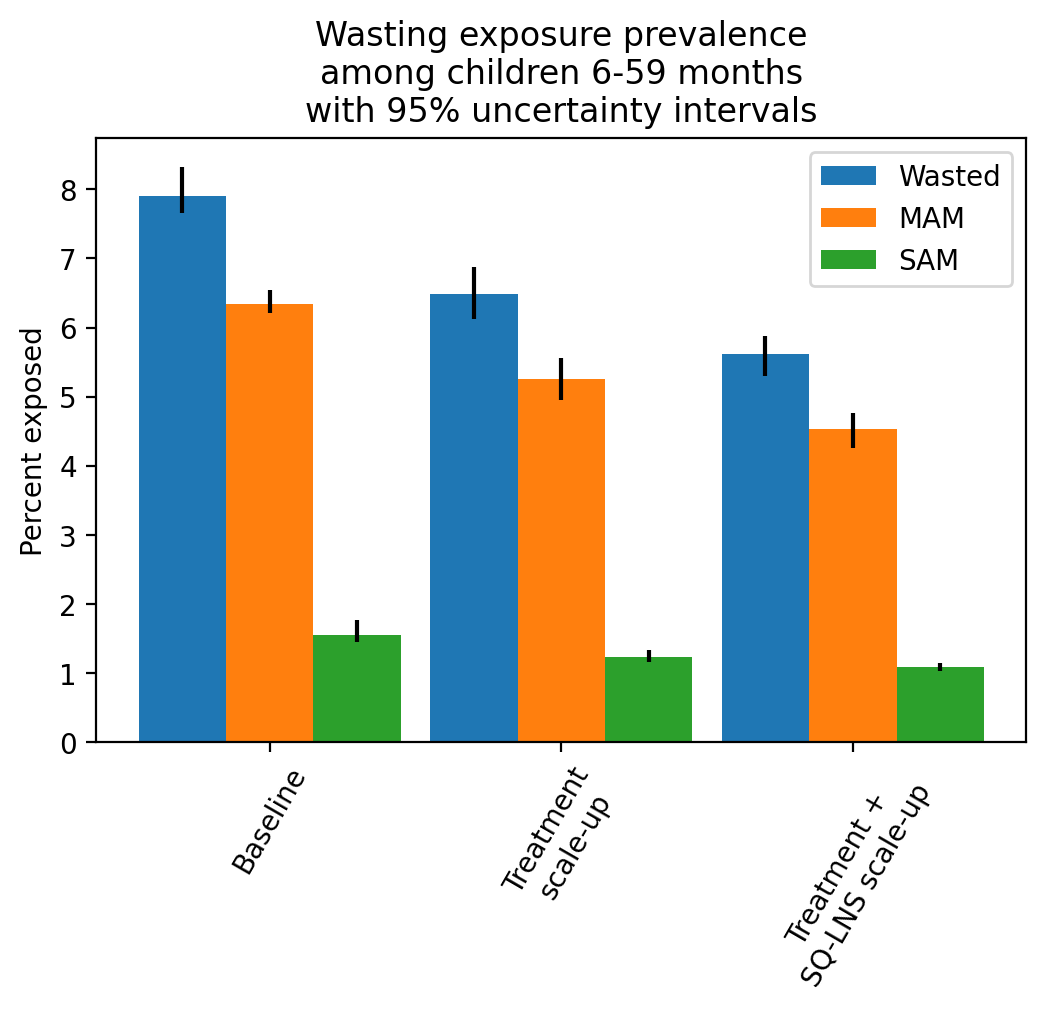

In [9]:
p = calculate_child_growth_exposure_prevalence('wasting', groupby_cols, True).reset_index()
p['order'] = np.where(p.scenario=='baseline', 0, np.where(p.scenario=='wasting_treatment', 1, 2))
p['value'] = p['value'] * 100
p = p.sort_values(by='order')
barWidth = 0.3
x_vals = [0,1,2,3]
labels = ['Wasted','MAM','SAM']
causes = ['wasted','moderate_acute_malnutrition','severe_acute_malnutrition']
scenarios = ['Baseline','Treatment\nscale-up', 'Treatment +\nSQ-LNS scale-up']
plt.figure(dpi=200)
for i in list(range(0,len(labels))):
    x = p.loc[p.cause==causes[i]]
    plt.bar([0+i*barWidth, 1+i*barWidth, 2+i*barWidth],
            x['value','mean'], yerr=[x['value','mean'] - x['value','2.5%'], 
                                              x['value','97.5%'] - x['value','mean']], 
            width=barWidth,
            label=labels[i])
plt.legend()
plt.xticks([r + 1*barWidth  for r in range(3)], scenarios, rotation=60)
plt.ylabel('Percent exposed')
plt.title('Wasting exposure prevalence\namong children 6-59 months\nwith 95% uncertainty intervals')

p

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


scenario                         cause   value             \
                                                      count       mean   
0            baseline            mild_child_wasting  1200.0  20.801988   
1            baseline   moderate_acute_malnutrition  1200.0   6.615122   
2            baseline     severe_acute_malnutrition  1200.0   1.726402   
3            baseline  susceptible_to_child_wasting  1200.0  70.856488   
4            baseline                        wasted  1200.0   8.341525   
10  wasting_treatment            mild_child_wasting  1200.0  21.055172   
11  wasting_treatment   moderate_acute_malnutrition  1200.0   5.830964   
12  wasting_treatment     severe_acute_malnutrition  1200.0   1.490679   
13  wasting_treatment  susceptible_to_child_wasting  1200.0  71.623184   
14  wasting_treatment                        wasted  1200.0   7.321644   
5               sqlns            mild_child_wasting  1200.0  21.211290   
6               sqlns   moderate_acute_malnutrition  1200.0   5.301563   
7               sqlns     severe_acute_malnutrition  1200.0   1.390147   
8               sqlns  susceptible_to_child_wasting  1200.0  72.097000   
9               sqlns                        wasted  1200.0   6.691710   

                                                                    order  
         std        min       2.5%        50%      97.5%        max        
0   0.101919  20.612842  20.648439  20.807773  20.996490  21.046797     0  
1   0.103529   6.475681   6.478224   6.613661   6.793122   6.796387     0  
2   0.102189   1.638306   1.638540   1.696169   1.942383   1.986995     0  
3   0.214518  70.343922  70.415382  70.884607  71.074554  71.076221     0  
4   0.201032   8.113987   8.116764   8.309830   8.735505   8.783382     0  
10  0.098000  20.923619  20.925155  21.069868  21.242440  21.279952     1  
11  0.151997   5.569877   5.595576   5.858910   6.075170   6.113593     1  
12  0.061718   1.398618   1.405132   1.490451   1.573715   1.575926     1  
13  0.221679  71.041792  71.175784  71.626169  71.898624  71.919618     1  
14  0.201340   7.004417   7.026752   7.333823   7.640720   7.678257     1  
5   0.098202  21.073031  21.089982  21.210497  21.419207  21.468474     2  
6   0.126700   5.056410   5.090907   5.301108   5.474289   5.475283     2  
7   0.052605   1.310358   1.317305   1.382530   1.473481   1.484943     2  
8   0.194806  71.616596  71.706138  72.138600  72.354702  72.376718     2  
9   0.161694   6.398159   6.433782   6.692705   6.914370   6.914930     2

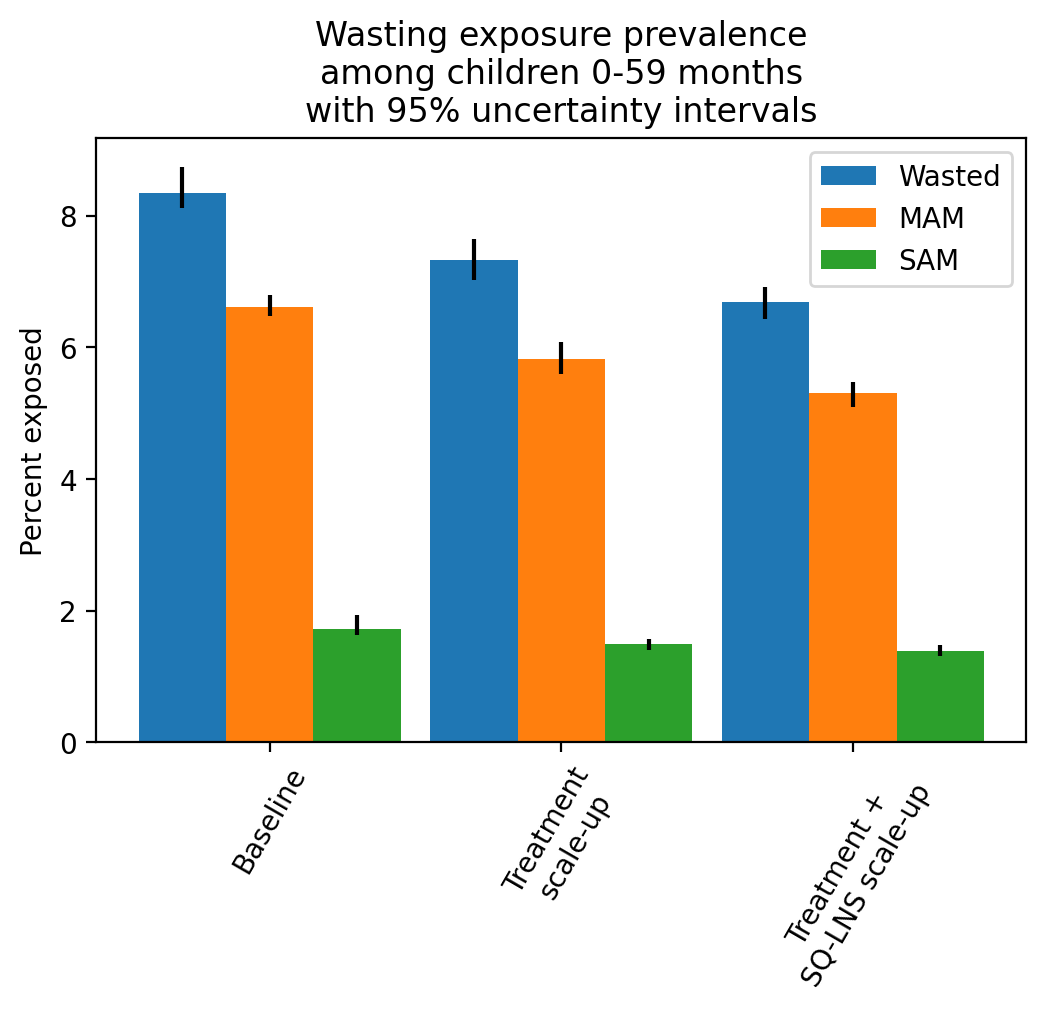

In [10]:
p = calculate_child_growth_exposure_prevalence('wasting', groupby_cols, False).reset_index()
p['order'] = np.where(p.scenario=='baseline', 0, np.where(p.scenario=='wasting_treatment', 1, 2))
p['value'] = p['value'] * 100
p = p.sort_values(by='order')
barWidth = 0.3
x_vals = [0,1,2,3]
labels = ['Wasted','MAM','SAM']
causes = ['wasted','moderate_acute_malnutrition','severe_acute_malnutrition']
scenarios = ['Baseline','Treatment\nscale-up', 'Treatment +\nSQ-LNS scale-up']
plt.figure(dpi=200)
for i in list(range(0,len(labels))):
    x = p.loc[p.cause==causes[i]]
    plt.bar([0+i*barWidth, 1+i*barWidth, 2+i*barWidth],
            x['value','mean'], yerr=[x['value','mean'] - x['value','2.5%'], 
                                              x['value','97.5%'] - x['value','mean']], 
            width=barWidth,
            label=labels[i])
plt.legend()
plt.xticks([r + 1*barWidth  for r in range(3)], scenarios, rotation=60)
plt.ylabel('Percent exposed')
plt.title('Wasting exposure prevalence\namong children 0-59 months\nwith 95% uncertainty intervals')
p

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


scenario    cause   value                                  \
                                 count       mean       std        min   
0            baseline     cat1  1200.0  17.755882  0.644289  16.461489   
1            baseline     cat2  1200.0  19.071315  0.529885  18.166591   
2            baseline     cat3  1200.0  20.780977  0.584867  19.980366   
3            baseline     cat4  1200.0  42.391826  0.712861  41.183400   
4            baseline  stunted  1200.0  36.827197  0.460050  36.236155   
10  wasting_treatment     cat1  1200.0  17.757105  0.644432  16.462763   
11  wasting_treatment     cat2  1200.0  19.072633  0.530227  18.166282   
12  wasting_treatment     cat3  1200.0  20.780160  0.585292  19.978663   
13  wasting_treatment     cat4  1200.0  42.390102  0.713185  41.180749   
14  wasting_treatment  stunted  1200.0  36.829738  0.460078  36.237405   
5               sqlns     cat1  1200.0  15.081484  1.064914  13.028152   
6               sqlns     cat2  1200.0  17.863024  0.756890  16.602971   
7               sqlns     cat3  1200.0  24.668392  1.099368  23.034969   
8               sqlns     cat4  1200.0  42.387100  0.712427  41.178278   
9               sqlns  stunted  1200.0  32.944507  1.232731  30.623611   

                                               order  
         2.5%        50%      97.5%        max        
0   16.678535  17.623498  18.710495  18.756424     0  
1   18.241033  19.075479  19.766206  19.783565     0  
2   20.015974  20.813230  21.742505  21.821981     0  
3   41.354086  42.229106  43.393560  43.405204     0  
4   36.238602  36.764801  37.573511  37.652617     0  
10  16.679792  17.624201  18.712111  18.758178     1  
11  18.241145  19.075608  19.769243  19.787031     1  
12  20.014579  20.812449  21.742326  21.821504     1  
13  41.351937  42.227280  43.392686  43.404007     1  
14  36.240812  36.766977  37.576436  37.654997     1  
5   13.249501  15.010606  16.468552  16.471286     2  
6   16.628319  17.784540  18.988766  19.120358     2  
7   23.066300  25.100141  25.909648  25.979034     2  
8   41.349864  42.223328  43.387109  43.397355     2  
9   30.832612  33.036238  34.650458  34.678106     2

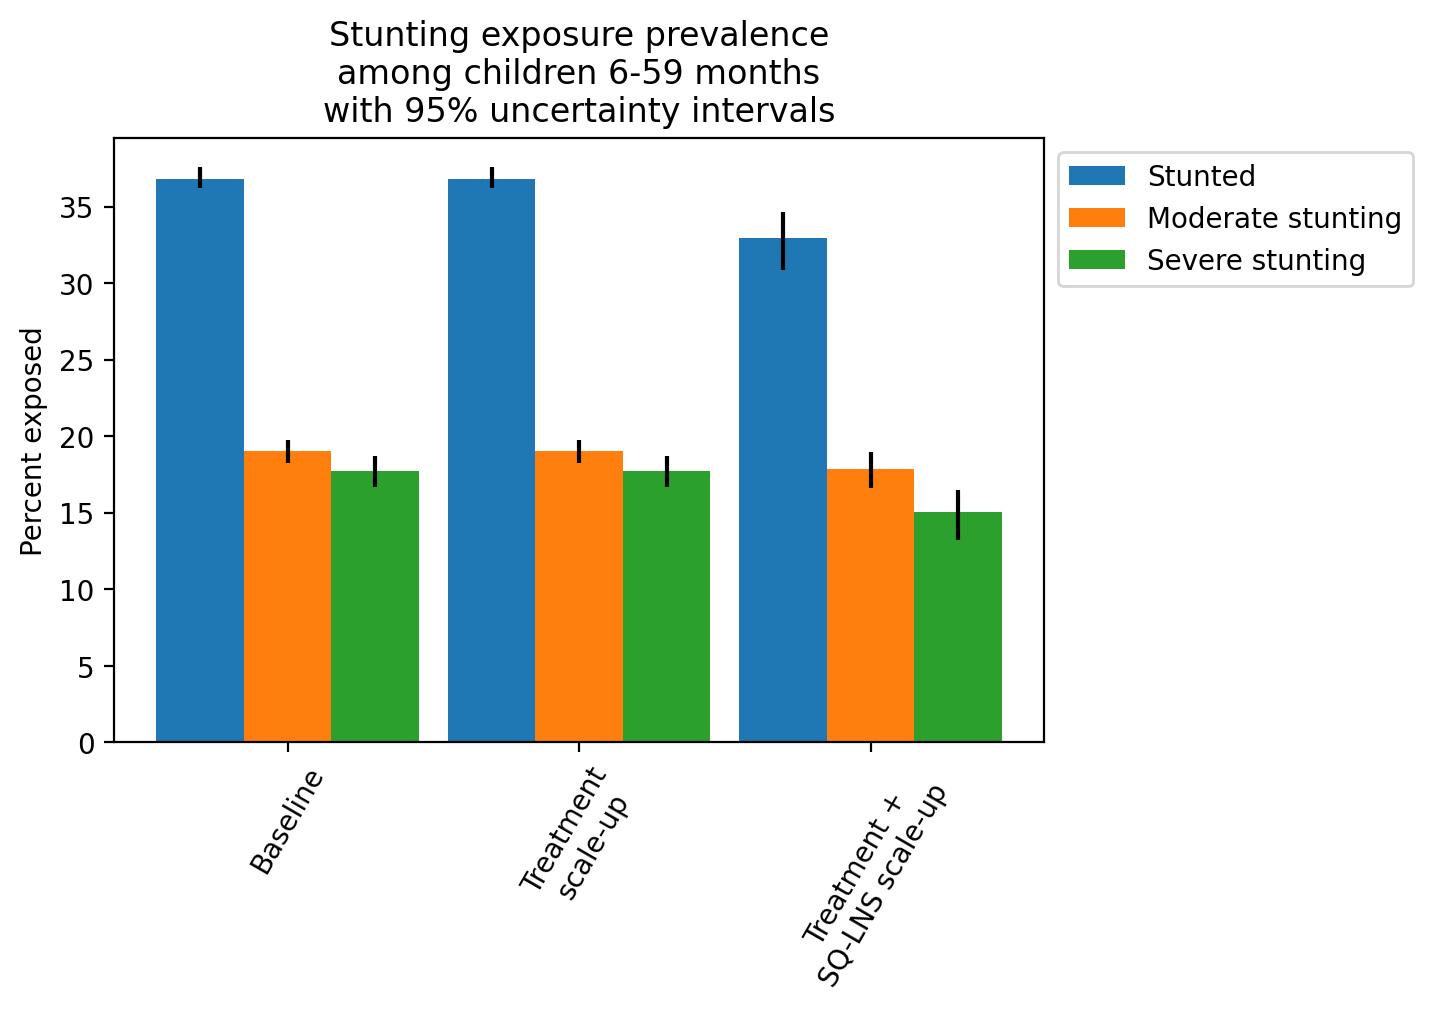

In [11]:
p = calculate_child_growth_exposure_prevalence('stunting', groupby_cols, True).reset_index()
p['order'] = np.where(p.scenario=='baseline', 0, np.where(p.scenario=='wasting_treatment', 1, 2))
p['value'] = p['value'] * 100
p = p.sort_values(by='order')
barWidth = 0.3
x_vals = [0,1,2,3]
labels = ['Stunted','Moderate stunting','Severe stunting']
causes = ['stunted','cat2','cat1']
scenarios = ['Baseline','Treatment\nscale-up', 'Treatment +\nSQ-LNS scale-up']
plt.figure(dpi=200)
for i in list(range(0,len(labels))):
    x = p.loc[p.cause==causes[i]]
    plt.bar([0+i*barWidth, 1+i*barWidth, 2+i*barWidth],
            x['value','mean'], yerr=[x['value','mean'] - x['value','2.5%'], 
                                              x['value','97.5%'] - x['value','mean']], 
            width=barWidth,
            label=labels[i])
plt.legend(bbox_to_anchor=[1,1])
plt.xticks([r + 1*barWidth  for r in range(3)], scenarios, rotation=60)
plt.ylabel('Percent exposed')
plt.title('Stunting exposure prevalence\namong children 6-59 months\nwith 95% uncertainty intervals')

p

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


scenario    cause   value                                  \
                                 count       mean       std        min   
0            baseline     cat1  1200.0  16.377097  0.569359  15.278086   
1            baseline     cat2  1200.0  18.119121  0.464278  17.324450   
2            baseline     cat3  1200.0  20.429204  0.517693  19.683843   
3            baseline     cat4  1200.0  45.074578  0.643115  44.008037   
4            baseline  stunted  1200.0  34.496218  0.416759  33.913330   
10  wasting_treatment     cat1  1200.0  16.378121  0.569490  15.279145   
11  wasting_treatment     cat2  1200.0  18.120169  0.464532  17.324318   
12  wasting_treatment     cat3  1200.0  20.428651  0.517992  19.682645   
13  wasting_treatment     cat4  1200.0  45.073060  0.643342  44.005809   
14  wasting_treatment  stunted  1200.0  34.498290  0.416823  33.914500   
5               sqlns     cat1  1200.0  14.446315  0.830371  12.918491   
6               sqlns     cat2  1200.0  17.246729  0.612897  16.195310   
7               sqlns     cat3  1200.0  23.236314  0.818092  22.020472   
8               sqlns     cat4  1200.0  45.070641  0.642828  44.003704   
9               sqlns  stunted  1200.0  31.693044  0.948018  29.861678   

                                               order  
         2.5%        50%      97.5%        max        
0   15.454553  16.264007  17.215371  17.242622     0  
1   17.386685  18.142770  18.719921  18.735287     0  
2   19.712674  20.433571  21.306044  21.366800     0  
3   44.162434  44.881303  45.980799  45.996350     0  
4   33.940842  34.457805  35.194379  35.252753     0  
10  15.455600  16.265700  17.216690  17.244042     1  
11  17.386860  18.142958  18.722234  18.737913     1  
12  19.711698  20.433050  21.305965  21.366510     1  
13  44.160486  44.879748  45.979876  45.995187     1  
14  33.942703  34.459590  35.196733  35.254714     1  
5   13.045694  14.345854  15.552941  15.593706     2  
6   16.229326  17.235427  18.159022  18.256808     2  
7   22.029934  23.564375  24.148866  24.149078     2  
8   44.158509  44.876612  45.975511  45.990013     2  
9   30.055262  31.741929  33.084969  33.106471     2

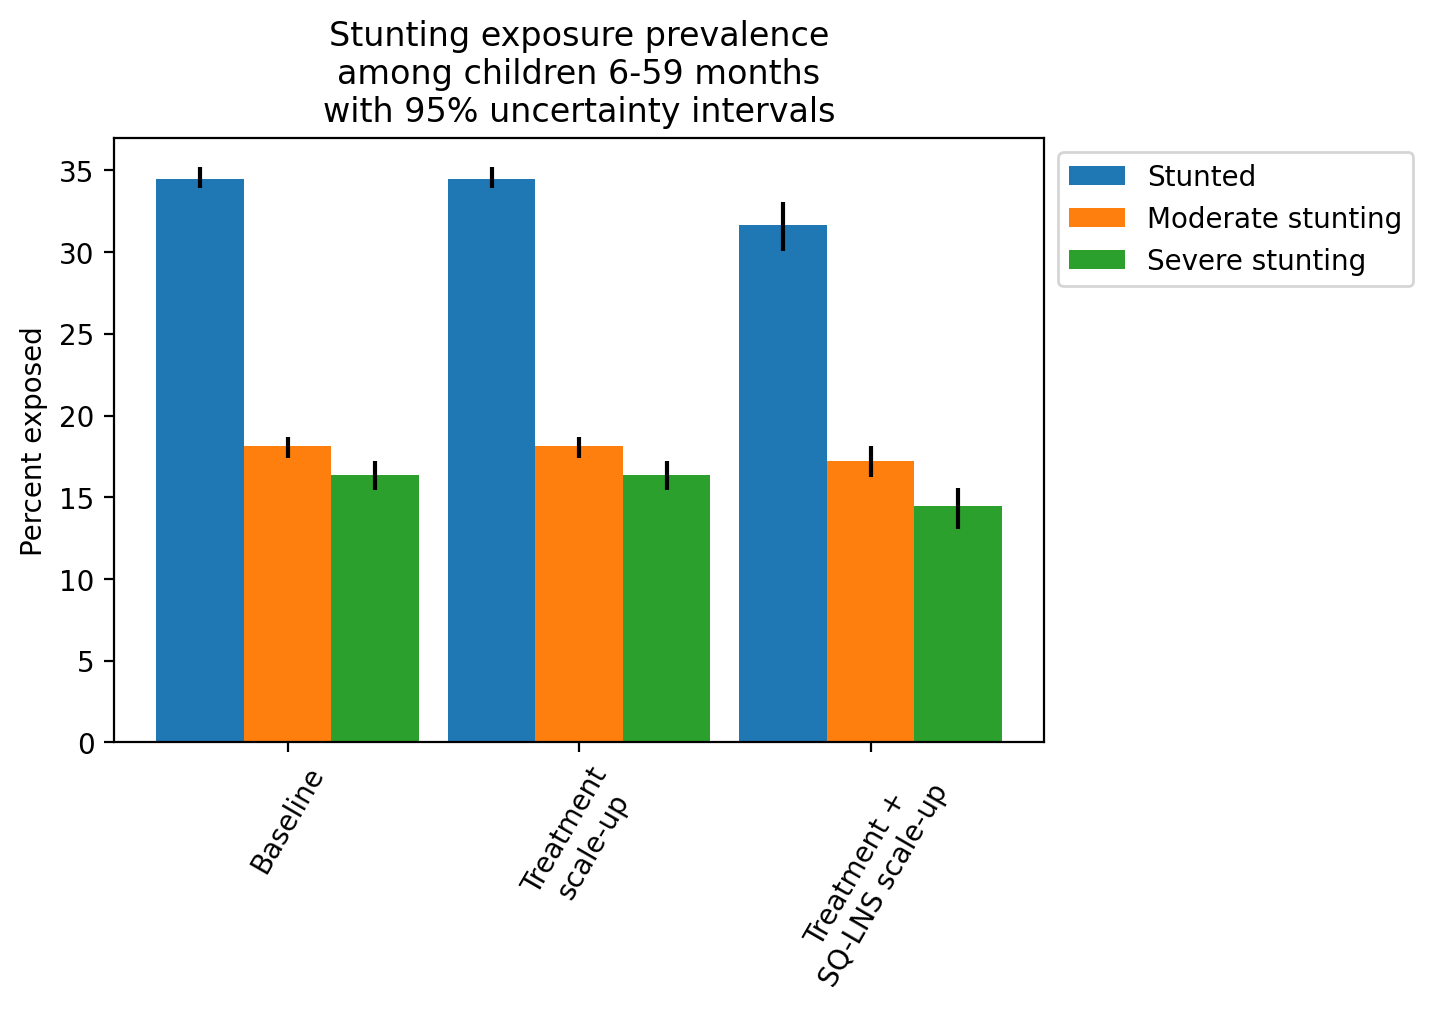

In [12]:
p = calculate_child_growth_exposure_prevalence('stunting', groupby_cols, False).reset_index()
p['order'] = np.where(p.scenario=='baseline', 0, np.where(p.scenario=='wasting_treatment', 1, 2))
p['value'] = p['value'] * 100
p = p.sort_values(by='order')
barWidth = 0.3
x_vals = [0,1,2,3]
labels = ['Stunted','Moderate stunting','Severe stunting']
causes = ['stunted','cat2','cat1']
scenarios = ['Baseline','Treatment\nscale-up', 'Treatment +\nSQ-LNS scale-up']
plt.figure(dpi=200)
for i in list(range(0,len(labels))):
    x = p.loc[p.cause==causes[i]]
    plt.bar([0+i*barWidth, 1+i*barWidth, 2+i*barWidth],
            x['value','mean'], yerr=[x['value','mean'] - x['value','2.5%'], 
                                              x['value','97.5%'] - x['value','mean']], 
            width=barWidth,
            label=labels[i])
plt.legend(bbox_to_anchor=[1,1])
plt.xticks([r + 1*barWidth  for r in range(3)], scenarios, rotation=60)
plt.ylabel('Percent exposed')
plt.title('Stunting exposure prevalence\namong children 6-59 months\nwith 95% uncertainty intervals')

p